### First step - getting the data

In [2]:
import pandas as pd

url = "https://drive.google.com/file/d/1oYQSNxfvw6kFr6-N9rKLRAnLXlp0osEt/view?usp=drive_link"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
spotify_df = pd.read_csv(path)

In [3]:
# making a copy
spotify_df_copy = spotify_df.copy()

In [7]:
# dropping unneccessary columns i deducted that make a mess in our data
spotify_df_copy.columns = spotify_df_copy.columns.str.strip()
spotify_df_copy = spotify_df_copy.drop(["type", "Unnamed: 0" , "duration_ms" , "time_signature", "speechiness"], axis=1)

In [8]:
spotify_df_copy.head(2)

name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                             0.658   0.259   
1  Antônio Carlos Jobim                                     0.742   0.399   

   key  loudness  mode  acousticness  instrumentalness  liveness  valence  \
0   11   -13.141     0         0.694          0.000059     0.975    0.306   
1    2   -12.646     1         0.217          0.000002     0.107    0.693   

     tempo                       id  \
0  110.376  1n7JnwviZ7zf0LR1tcGFq7    
1  125.039  5QGM1U0eCYrQuwSJwTm5Zq    

                                                html  
0  https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1  https://open.spotify.com/track/5QGM1U0eCYrQuwS...

### scaling

In [45]:
# importing certain libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


In [10]:
# selecting neccessary columns
selected = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# running the scaling for the dataset

scaling = MinMaxScaler().set_output(transform='pandas')

#scaled version of the data
scaled_spotify_songs = scaling.fit_transform(spotify_df_copy[selected])


In [11]:
scaled_spotify_songs.head(10)

danceability  energy       key  loudness  mode  acousticness  \
0      0.680455  0.2590  1.000000  0.763897   0.0      0.696787   
1      0.767322  0.3990  0.181818  0.771967   1.0      0.217871   
2      0.880041  0.7300  0.181818  0.798018   1.0      0.454819   
3      0.729059  0.0502  0.363636  0.682811   1.0      0.882530   
4      0.673216  0.1190  0.545455  0.655228   1.0      0.919679   
5      0.481903  0.1460  0.272727  0.692837   1.0      0.934739   
6      0.698035  0.2070  1.000000  0.752828   0.0      0.966867   
7      0.521200  0.7330  0.636364  0.803365   1.0      0.698795   
8      0.717684  0.5460  0.909091  0.791432   1.0      0.399598   
9      0.697001  0.8640  0.090909  0.848179   1.0      0.643574   

   instrumentalness  liveness   valence     tempo  
0          0.000060  0.987842  0.310660  0.515800  
1          0.000002  0.108409  0.703553  0.584322  
2          0.000064  0.125633  0.918782  0.437862  
3          0.000041  0.391084  0.531980  0.499098  
4          0.000348  0.105370  0.408122  0.565171  
5          0.156345  0.108409  0.429442  0.667718  
6          0.420305  0.113475  0.694416  0.437081  
7          0.000057  0.681864  0.899492  0.451259  
8          0.077157  0.155015  0.650761  0.794579  
9          0.363452  0.140831  0.544162  0.467288

### Kmeans

In [2]:
# import to plot the graphs
import matplotlib.pyplot as plt
import seaborn as sns


#### Elbow

In [14]:
seed = 123

max_k = 30

inertia_list = []

for i in range(20 , max_k +1):
    myKmeans = KMeans(n_clusters=i,
                      n_init = 'auto',  # please make sure to check this one
                      random_state=seed)
    myKmeans.fit(scaled_spotify_songs[selected])  # no need for fit_transform when it is a kmeans

    inertia_list.append(myKmeans.inertia_)

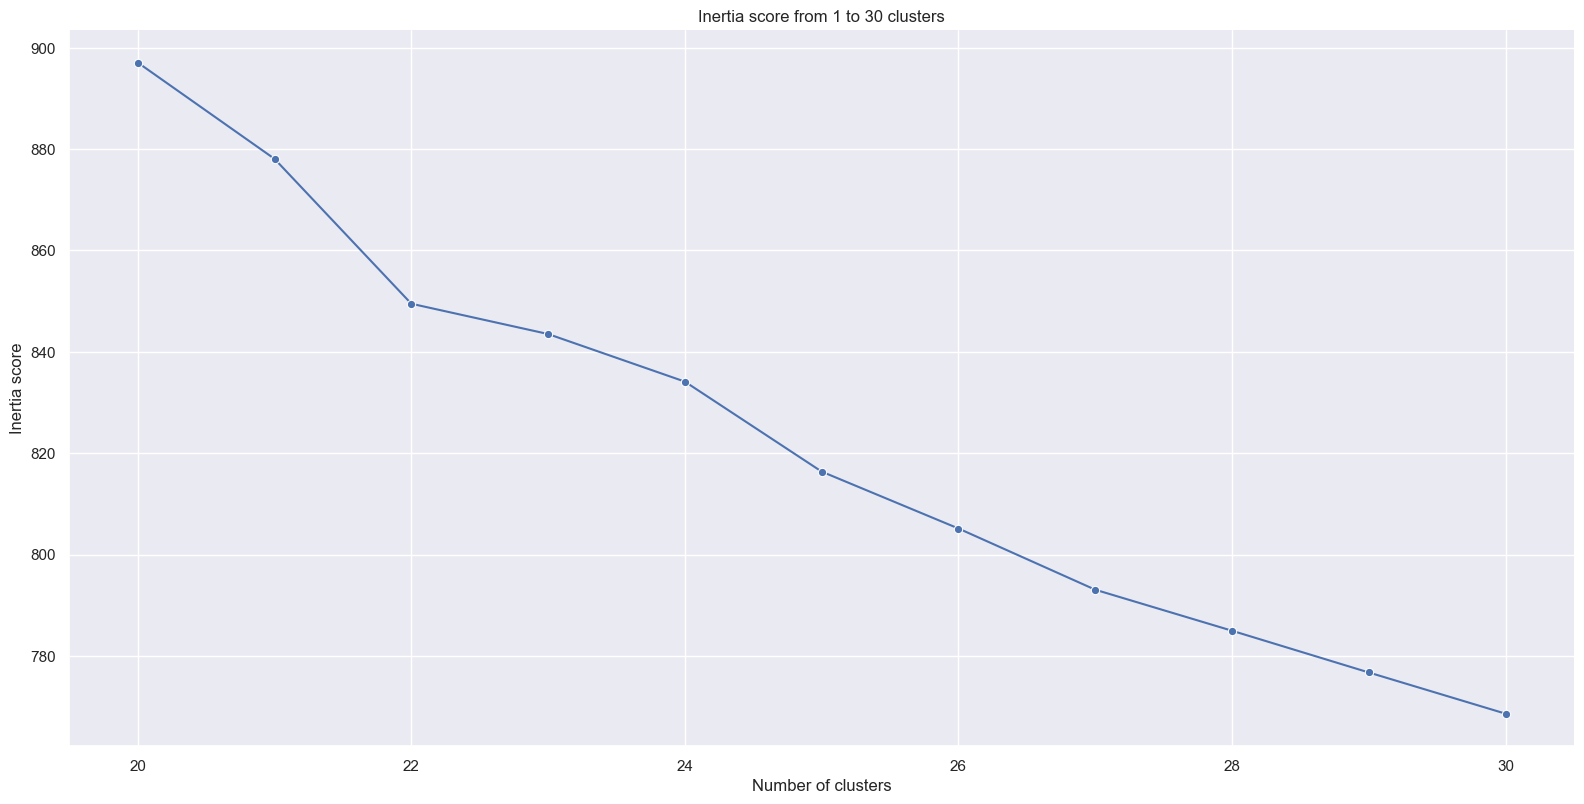

In [15]:
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,

            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

#### Silhouette

In [16]:
max_k = 30

# desclare a variable where we can note down the scores of the silhouette

sil_scores = []

for j in range(20 , max_k ): # it starts from 2 clusters because of the
                            # reason we explained earlier
    using_kmeans=KMeans(n_clusters=j , n_init='auto' , random_state=seed)

    using_kmeans.fit(scaled_spotify_songs[selected])

    labels = using_kmeans.labels_

    score = silhouette_score( scaled_spotify_songs[selected] , labels)

    sil_scores.append(score)

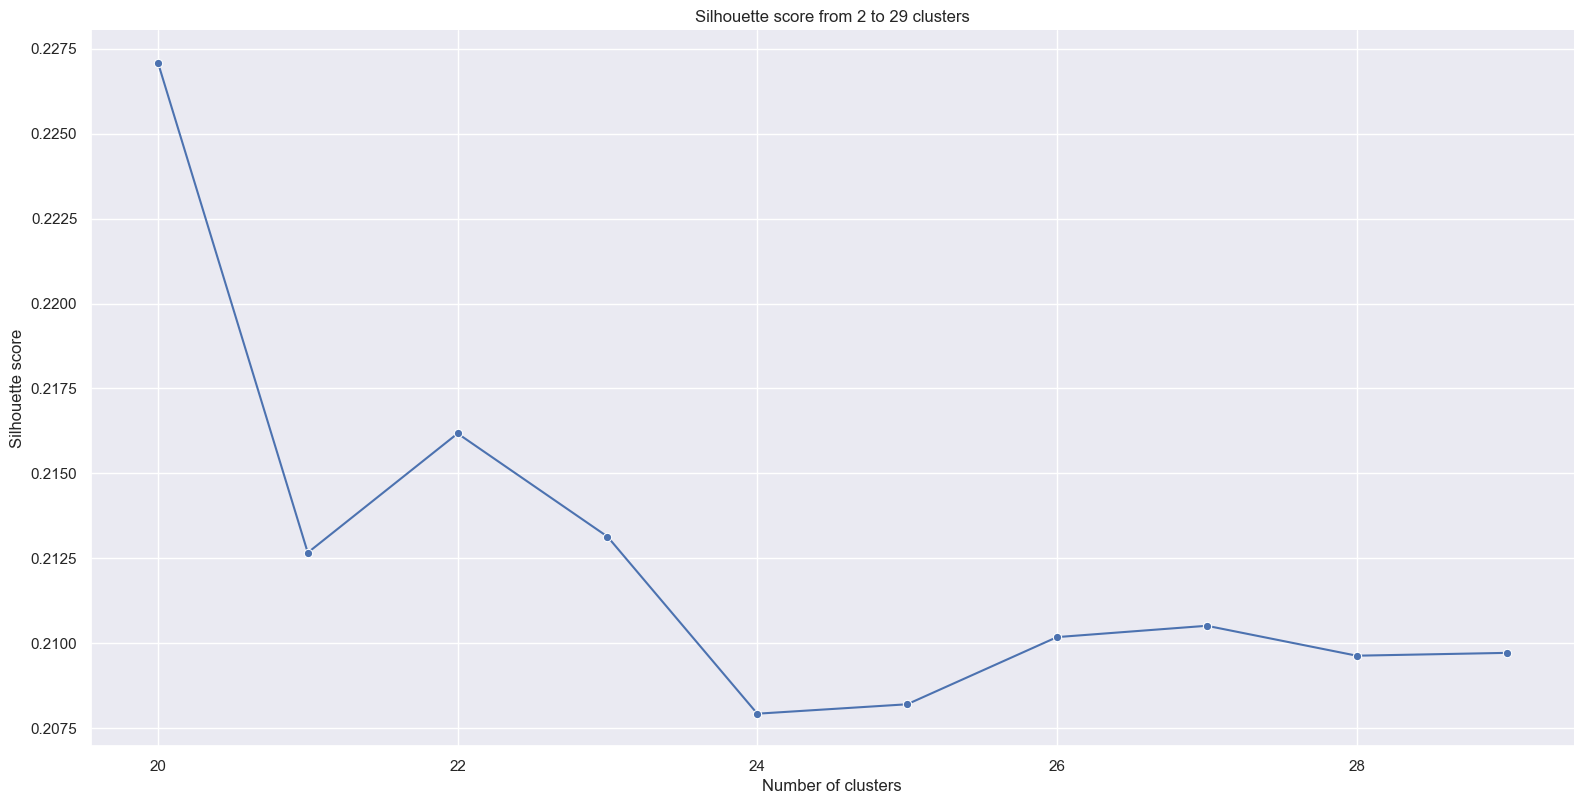

In [17]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [18]:
scaled_spotify_songs

danceability   energy       key  loudness  mode  acousticness  \
0         0.680455  0.25900  1.000000  0.763897   0.0      0.696787   
1         0.767322  0.39900  0.181818  0.771967   1.0      0.217871   
2         0.880041  0.73000  0.181818  0.798018   1.0      0.454819   
3         0.729059  0.05020  0.363636  0.682811   1.0      0.882530   
4         0.673216  0.11900  0.545455  0.655228   1.0      0.919679   
...            ...      ...       ...       ...   ...           ...   
5230      0.208893  0.06940  0.272727  0.596818   1.0      0.920683   
5231      0.194416  0.10100  0.545455  0.621548   1.0      0.858434   
5232      0.061634  0.00093  0.818182  0.277803   1.0      0.954819   
5233      0.137539  0.02080  0.363636  0.498142   1.0      0.886546   
5234      0.366081  0.04870  0.454545  0.577614   1.0      0.786145   

      instrumentalness  liveness   valence     tempo  
0             0.000060  0.987842  0.310660  0.515800  
1             0.000002  0.108409  0.703553  0.584322  
2             0.000064  0.125633  0.918782  0.437862  
3             0.000041  0.391084  0.531980  0.499098  
4             0.000348  0.105370  0.408122  0.565171  
...                ...       ...       ...       ...  
5230          0.725888  0.084296  0.066497  0.410795  
5231          0.432487  0.070314  0.036041  0.388495  
5232          0.983756  0.078217  0.034924  0.334469  
5233          0.512690  0.112462  0.060000  0.313608  
5234          0.491371  0.287741  0.256853  0.299640  

[5235 rows x 10 columns]

In [19]:
# Selected number of clusters
nr_clusters = 22

# declaring the model
my_kmeans = KMeans(n_clusters=nr_clusters , random_state=seed).set_output(transform='pandas')

# fitting the data
my_kmeans.fit(scaled_spotify_songs[selected])

# getting the data from K-means

transformed_data_spotify = my_kmeans.labels_

centers = my_kmeans.cluster_centers_

centroids = pd.DataFrame(centers ,columns=selected)

In [20]:
# we will need the centroids below
centroids = centroids.round(3)

In [21]:
scaled_spotify_songs['playlists'] = transformed_data_spotify

In [22]:
scaled_spotify_songs.sort_values('playlists')

danceability  energy       key  loudness  mode  acousticness  \
4140      0.193382   0.983  0.636364  0.923380   1.0      0.044679   
4134      0.250259   0.879  0.909091  0.729957   1.0      0.005633   
4133      0.256463   0.996  0.818182  0.902726   1.0      0.000414   
3430      0.175801   0.944  0.636364  0.862737   1.0      0.000002   
3425      0.306101   0.859  0.909091  0.810146   1.0      0.000090   
...            ...     ...       ...       ...   ...           ...   
28        0.571872   0.550  0.090909  0.759659   1.0      0.803213   
27        0.512927   0.242  0.363636  0.741026   1.0      0.704819   
20        0.660807   0.552  0.272727  0.826758   1.0      0.835341   
1007      0.421923   0.436  0.000000  0.852401   1.0      0.808233   
1008      0.553257   0.797  0.272727  0.855319   1.0      0.481928   

      instrumentalness  liveness   valence     tempo  playlists  
4140          0.464975  0.422492  0.189848  0.438086          0  
4134          0.941117  0.127660  0.080711  0.564311          0  
4133          0.795939  0.305978  0.070152  0.583476          0  
3430          0.762437  0.081459  0.173604  0.382181          0  
3425          0.822335  0.284701  0.381726  0.457704          0  
...                ...       ...       ...       ...        ...  
28            0.000734  0.917933  0.689340  0.640292         21  
27            0.000000  0.175279  0.744162  0.386326         21  
20            0.000000  0.123607  0.481218  0.669382         21  
1007          0.000002  0.309017  0.481218  0.817907         21  
1008          0.000035  0.142857  0.622335  0.695523         21  

[5235 rows x 11 columns]

In [23]:
spotify_df_copy['playlists'] = transformed_data_spotify

### Categorising playlists

In [24]:
selected.append('playlists')

In [27]:
def naming_playlists(playlists , variances):
    
    representative = []
    titles = []
    for i in range(len(playlists)):
        representative.append(variances.iloc[i].sort_values().index[1:4].values)
        titles.append(playlist_name(playlists[representative[i]].iloc[i]))
        
    
    return titles , representative
        
        

In [28]:
def playlist_name(playlist):
    title =''
    
    descriptions = {
    'danceability': {
        'Low': 'Chill',
        'Medium': 'Groovy',
        'High': 'Dancefloor'
    },
    'energy': {
        'Low': 'Calm',
        'Medium': 'Energetic',
        'High': 'High-Energy'
    },
    'key': {
        'Low': 'Soft',
        'Medium': 'Moderate',
        'High': 'Sharp'
    },
    'loudness': {
        'Low': 'Quiet',
        'Medium': 'Moderate',
        'High': 'Loud'
    },
    'mode': {
        'Low': 'Minor-modal',
        'Medium': 'Neutral-modal',
        'High': 'Major-modal'
    },
    'acousticness': {
        'Low': 'Electric',
        'Medium': 'Blended',
        'High': 'Acoustic'
    },
    'instrumentalness': {
        'Low': 'Vocal',
        'Medium': 'Mixed',
        'High': 'Instrumental'
    },
    'liveness': {
        'Low': 'Studio',
        'Medium': 'Mixed',
        'High': 'Live'
    },
    'valence': {
        'Low': 'Melancholic',
        'Medium': 'Balanced',
        'High': 'Joyful'
    },
    'tempo': {
        'Low': 'Slow',
        'Medium': 'Moderate',
        'High': 'Fast'
    }
}

    
    for i in range(3):
        if playlist[playlist.index[i]]>=0 and playlist[playlist.index[i]]<=0.33:
            title = title +' '+ descriptions[playlist.index[i]]['Low']
        elif playlist[playlist.index[i]]>0.33 and playlist[playlist.index[i]]<=0.66:
            title = title +' '+ descriptions[playlist.index[i]]['Medium']
        elif playlist[playlist.index[i]]>0.66 and playlist[playlist.index[i]]<=1.0:
            title = title +' '+ descriptions[playlist.index[i]]['High']
        else : print('error')
        
    return title
    
    

In [29]:
title , representative = naming_playlists( centroids , scaled_spotify_songs.groupby('playlists').var() )

In [30]:
scaled_spotify_songs.groupby('playlists').var()

danceability    energy       key  loudness  mode  acousticness  \
playlists                                                                   
0              0.013264  0.008318  0.020190  0.002704   0.0      0.001981   
1              0.026451  0.032307  0.085748  0.005543   0.0      0.023206   
2              0.027922  0.015306  0.025820  0.011724   0.0      0.006171   
3              0.018172  0.023545  0.018101  0.001427   0.0      0.013025   
4              0.018230  0.025140  0.025242  0.002570   0.0      0.024660   
5              0.032555  0.016803  0.012970  0.002397   0.0      0.007989   
6              0.012740  0.018428  0.037272  0.001598   0.0      0.026396   
7              0.025685  0.014970  0.099562  0.012895   0.0      0.013650   
8              0.008989  0.004835  0.013975  0.001344   0.0      0.000139   
9              0.017697  0.014737  0.024047  0.001658   0.0      0.005255   
10             0.034601  0.017528  0.030550  0.001448   0.0      0.004727   
11             0.026829  0.014660  0.080932  0.007150   0.0      0.016604   
12             0.037161  0.015862  0.035368  0.002441   0.0      0.006319   
13             0.030839  0.027062  0.068149  0.002668   0.0      0.032350   
14             0.012249  0.011009  0.008693  0.002827   0.0      0.000942   
15             0.016130  0.024234  0.022812  0.001958   0.0      0.015479   
16             0.025258  0.025768  0.028642  0.005309   0.0      0.014587   
17             0.013734  0.021428  0.014154  0.002067   0.0      0.026054   
18             0.017538  0.020184  0.014356  0.002340   0.0      0.019072   
19             0.022832  0.013571  0.017100  0.011959   0.0      0.012882   
20             0.016007  0.020842  0.026534  0.002162   0.0      0.011608   
21             0.018668  0.036790  0.020444  0.003393   0.0      0.024826   

           instrumentalness  liveness   valence     tempo  
playlists                                                  
0                  0.020196  0.019940  0.020229  0.016484  
1                  0.013355  0.032051  0.049880  0.018124  
2                  0.010091  0.010417  0.030728  0.029684  
3                  0.002485  0.018038  0.018557  0.015112  
4                  0.012864  0.028821  0.032465  0.020458  
5                  0.026993  0.017000  0.032457  0.014893  
6                  0.002092  0.021100  0.019859  0.016238  
7                  0.010471  0.009859  0.023723  0.020425  
8                  0.023084  0.013983  0.017471  0.015888  
9                  0.015041  0.032089  0.021744  0.018434  
10                 0.008451  0.032724  0.023095  0.011643  
11                 0.009943  0.026548  0.023174  0.019869  
12                 0.022808  0.025198  0.036654  0.015403  
13                 0.027879  0.022371  0.050098  0.011908  
14                 0.015029  0.018123  0.019879  0.019830  
15                 0.004621  0.020779  0.018161  0.012894  
16                 0.004451  0.031344  0.026972  0.016615  
17                 0.010233  0.025256  0.026810  0.014435  
18                 0.003425  0.019960  0.014880  0.013886  
19                 0.020870  0.013140  0.020616  0.023411  
20                 0.001884  0.021982  0.013350  0.013456  
21                 0.007351  0.026087  0.041808  0.018945

In [31]:
# Since we can see below most of it has to do with loudness and it does not give a proper playlist name , let's
# not include it in the titles 
title

[' Electric Loud High-Energy',
 ' Loud Vocal Moderate',
 ' Acoustic Instrumental Studio',
 ' Loud Vocal Electric',
 ' Loud Vocal Groovy',
 ' Loud Electric Sharp',
 ' Loud Vocal Dancefloor',
 ' Studio Instrumental Moderate',
 ' Electric Loud High-Energy',
 ' Loud Electric High-Energy',
 ' Loud Electric Vocal',
 ' Loud Vocal Calm',
 ' Loud Electric Moderate',
 ' Loud Moderate Studio',
 ' Electric Loud Soft',
 ' Loud Vocal Moderate',
 ' Vocal Loud Electric',
 ' Loud Vocal Dancefloor',
 ' Loud Vocal Moderate',
 ' Moderate Acoustic Studio',
 ' Vocal Loud Electric',
 ' Loud Vocal Groovy']

In [32]:
# also considering on what a title should have , it think it would be appropriate if we took in consideration only these:

updated_selected = ['danceability', 'energy', 'acousticness', 'valence', 'tempo']

In [33]:
selected

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlists']

In [34]:
title , representative = naming_playlists( centroids , scaled_spotify_songs.groupby('playlists')[updated_selected].var() )

In [35]:
title

[' High-Energy Chill Moderate',
 ' Acoustic Groovy Energetic',
 ' Calm Groovy Moderate',
 ' Moderate Groovy Balanced',
 ' Moderate Blended Energetic',
 ' Moderate High-Energy Melancholic',
 ' Moderate High-Energy Joyful',
 ' Calm Moderate Melancholic',
 ' High-Energy Chill Moderate',
 ' High-Energy Groovy Moderate',
 ' Moderate High-Energy Melancholic',
 ' Acoustic Moderate Melancholic',
 ' Moderate High-Energy Melancholic',
 ' High-Energy Groovy Electric',
 ' High-Energy Chill Moderate',
 ' Electric Dancefloor Balanced',
 ' Moderate Groovy High-Energy',
 ' Moderate High-Energy Electric',
 ' Joyful Dancefloor Electric',
 ' Calm Melancholic Chill',
 ' Joyful Moderate Dancefloor',
 ' Moderate Acoustic Energetic']

In [40]:
scaled_spotify_songs

danceability   energy       key  loudness  mode  acousticness  \
0         0.680455  0.25900  1.000000  0.763897   0.0      0.696787   
1         0.767322  0.39900  0.181818  0.771967   1.0      0.217871   
2         0.880041  0.73000  0.181818  0.798018   1.0      0.454819   
3         0.729059  0.05020  0.363636  0.682811   1.0      0.882530   
4         0.673216  0.11900  0.545455  0.655228   1.0      0.919679   
...            ...      ...       ...       ...   ...           ...   
5230      0.208893  0.06940  0.272727  0.596818   1.0      0.920683   
5231      0.194416  0.10100  0.545455  0.621548   1.0      0.858434   
5232      0.061634  0.00093  0.818182  0.277803   1.0      0.954819   
5233      0.137539  0.02080  0.363636  0.498142   1.0      0.886546   
5234      0.366081  0.04870  0.454545  0.577614   1.0      0.786145   

      instrumentalness  liveness   valence     tempo  playlists  
0             0.000060  0.987842  0.310660  0.515800          1  
1             0.000002  0.108409  0.703553  0.584322         18  
2             0.000064  0.125633  0.918782  0.437862         18  
3             0.000041  0.391084  0.531980  0.499098         11  
4             0.000348  0.105370  0.408122  0.565171         11  
...                ...       ...       ...       ...        ...  
5230          0.725888  0.084296  0.066497  0.410795         19  
5231          0.432487  0.070314  0.036041  0.388495          2  
5232          0.983756  0.078217  0.034924  0.334469          2  
5233          0.512690  0.112462  0.060000  0.313608         19  
5234          0.491371  0.287741  0.256853  0.299640         19  

[5235 rows x 11 columns]

## Assigning titles to the clusters

In [41]:
spotify_df_copy['title'] = None
for i  in range(len(spotify_df_copy)):
    index = spotify_df_copy['playlists'][i]
    spotify_df_copy['title'][i]=title[index]

C:\Users\czarn\AppData\Local\Temp\ipykernel_14964\225866307.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  spotify_df_copy['title'][i]=title[index]
C:\Users\czarn\AppData\Local\Temp\ipykernel_14964\225866307.py:4: SettingWithCopyWarning

In [42]:
spotify_df_copy

name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5230  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5231  Tristan Murail                                          0.1880  0.10100   
5232  Arnold Schoenberg                                       0.0596  0.00093   
5233  Antonín Dvořák                                          0.1330  0.02080   
5234  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  acousticness  instrumentalness  liveness  valence  \
0      11   -13.141     0         0.694          0.000059    0.9750   0.3060   
1       2   -12.646     1         0.217          0.000002    0.1070   0.6930   
2       2   -11.048     1         0.453          0.000063    0.1240   0.9050   
3       4   -18.115     1         0.879          0.000041    0.3860   0.5240   
4       6   -19.807     1         0.916          0.000343    0.1040   0.4020   
...   ...       ...   ...           ...               ...       ...      ...   
5230    3   -23.390     1         0.917          0.715000    0.0832   0.0655   
5231    6   -21.873     1         0.855          0.426000    0.0694   0.0355   
5232    9   -42.959     1         0.951          0.969000    0.0772   0.0344   
5233    4   -29.443     1         0.883          0.505000    0.1110   0.0591   
5234    5   -24.568     1         0.783          0.484000    0.2840   0.2530   

        tempo                       id  \
0     110.376  1n7JnwviZ7zf0LR1tcGFq7    
1     125.039  5QGM1U0eCYrQuwSJwTm5Zq    
2      93.698  0NLIFSZxPzQhCwnkn5PJYs    
3     106.802  3mXqOdlLE1k67WsAxryPFs    
4     120.941  7bSzjzjTkWT2CkIPPdp0eA    
...       ...                      ...   
5230   87.906  1aEhYlZtypmipA06SDJ4U3    
5231   83.134  1Gfqe7TAKklmuZf6hxsH6h    
5232   71.573  2XNwnFrdMDpismp0VUZ7cU    
5233   67.109  7ucDwgMtE3YJtEfTbuRhy0    
5234   64.120  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html  playlists  \
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...          1   
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...         18   
2     https://open.spotify.com/track/0NLIFSZxPzQhCwn...         18   
3     https://open.spotify.com/track/3mXqOdlLE1k67Ws...         11   
4     https://open.spotify.com/track/7bSzjzjTkWT2CkI...         11   
...                                                 ...        ...   
5230  https://open.spotify.com/track/1aEhYlZtypmipA0...         19   
5231  https://open.spotify.com/track/1Gfqe7TAKklmuZf...          2   
5232  https://open.spotify.com/track/2XNwnFrdMDpismp...          2   
5233  https://open.spotify.com/track/7ucDwgMtE3YJtEf...         19   
5234  https://open.spotify.com/track/7E1ErYYCn0lYjHO...         19   

                               title  
0          Acoustic Gro

### There i want to assign titles,ids etc to scaled data to find best representatives for the songs

In [43]:
# Step 1: Extract columns from spotify_df_copy
columns_to_copy = spotify_df_copy[['name', 'id', 'artist', 'title']]

# Step 2: Assign these columns to scaled_spotify_songs based on index
scaled_spotify_songs[['name', 'id', 'artist','title']] = columns_to_copy

### Now i want to find for every songs its ecludian distance to a cluster

In [47]:
feature_columns = ['danceability', 'valence', 'acousticness', 'energy', 'instrumentalness', 'mode', 'key']

# Calculate cluster centroids
centroids = scaled_spotify_songs.groupby('playlists')[feature_columns].mean()

# Compute distance from a song to its cluster centroid
def compute_distance(row, centroids):
    cluster_id = row['playlists']
    centroid = centroids.loc[cluster_id].values
    song_features = row[feature_columns].values
    distance = np.linalg.norm(song_features - centroid)
    return distance

# Apply the function to each row to compute distances
scaled_spotify_songs['distance_to_centroid'] = scaled_spotify_songs.apply(compute_distance, axis=1, centroids=centroids)

In [ ]:
## making copy to save that step
scaled_spotify_songs_final = scaled_spotify_songs.copy()

In [54]:
import pandas as pd

# Function to get top-N representative songs for each cluster
def get_representative_songs(df, top_n=25):
    # Create an empty DataFrame to store the results
    representative_songs = pd.DataFrame()
    
    # Iterate through each cluster
    for cluster_id in df['playlists'].unique():
        # Filter songs for the current cluster
        cluster_songs = df[df['playlists'] == cluster_id]
        # Sort songs by distance to centroid
        sorted_songs = cluster_songs.sort_values(by='distance_to_centroid', ascending=True)
        # Select the top-N songs
        top_songs = sorted_songs.head(top_n)
        # Append the top songs to the results DataFrame
        representative_songs = pd.concat([representative_songs, top_songs])
    
    return representative_songs

# Get the top 20 representative songs for each cluster
top_representative_songs = get_representative_songs(scaled_spotify_songs_final, top_n=25)

# Display the results
top_representative_songs

danceability  energy       key  loudness  mode  acousticness  \
2483      0.609100   0.386  0.454545  0.847494   0.0      0.753012   
2610      0.504654   0.337  0.454545  0.812086   0.0      0.854418   
234       0.516029   0.373  0.454545  0.851912   0.0      0.861446   
912       0.577042   0.231  0.454545  0.791692   0.0      0.808233   
2484      0.577042   0.231  0.454545  0.791692   0.0      0.808233   
...            ...     ...       ...       ...   ...           ...   
3626      0.203723   0.983  0.181818  0.907942   1.0      0.000023   
3904      0.330920   0.879  0.090909  0.802615   1.0      0.000007   
4208      0.205791   0.892  0.181818  0.838219   1.0      0.000035   
3817      0.294726   0.954  0.272727  0.899791   1.0      0.000002   
4366      0.412616   0.932  0.181818  0.866894   1.0      0.001145   

      instrumentalness  liveness   valence     tempo  playlists  \
2483          0.000000  0.151976  0.525888  0.665316          1   
2610          0.000022  0.127660  0.478173  0.622786          1   
234           0.000000  0.148936  0.395939  0.648208          1   
912           0.000000  0.143870  0.409137  0.341619          1   
2484          0.000000  0.143870  0.409137  0.341619          1   
...                ...       ...       ...       ...        ...   
3626          0.103553  0.394124  0.098782  0.427735          8   
3904          0.093706  0.377913  0.092589  0.607827          8   
4208          0.005208  0.243161  0.182741  0.283172          8   
3817          0.222335  0.106383  0.276142  0.595752          8   
4366          0.022944  0.232016  0.200000  0.583803          8   

                                                   name  \
2483  Alone Together                                ...   
2610  They Can't Take That Away from Me - 2012 Remas...   
234   De Mi Esperanza                               ...   
912   Teach Me Tonight                              ...   
2484  Teach Me Tonight                              ...   
...                                                 ...   
3626  Malevolent Creation                           ...   
3904  Gone                                          ...   
4208  Evocation                                     ...   
3817  Rising of Infection                           ...   
4366  I Take                                        ...   

                           id  \
2483  47xU4Sm1RWZgRgugWPFxzz    
2610  2Ef24NcyyZAMngL4uQd3xC    
234   5XqXlrZLx0xPN5gSsfWPYF    
912   0Rk9byjmZksAJX15onGns5    
2484  0Rk9byjmZksAJX15onGns5    
...                       ...   
3626  6FqXaxRnVAhBVoddkpKFMq    
3904  6YJBDcl4K8zqqtDax3BwAx    
4208  1YjbqNRydjZFF9x4gpQCye    
3817  2s9cNtb6N0RIXCG0CvwrBF    
4366  0pYbCULkJFHkvpAnhSC4Wd    

                                                artist  \
2483  Peggy Lee                                          
2610  Mel Tormé                                          
234   Jorge Cafrune                                      
912   Dinah Washington                                   
2484  Dinah Washington                                   
...                                                ...   
3626  Raining Blood                                      
3904  Oppressor                                          
4208  Asphyx                                             
3817  Electrocution                                      
4366  Altar                                              

                            title  distance_to_centroid  
2483    Acoustic Groovy Energetic              0.100924  
2610    Acoustic Groovy Energetic              0.122388  
234     Acoustic Groovy Energetic              0.139294  
912     Acoustic Groovy Energetic              0.142486  
2484    Acoustic Groovy Energetic              0.142486  
...                           ...                   ...  
3626   High-Energy Chill Moderate              0.152285  
3904   High-Energy Chill Moderate              0.156252  
4208   High-Energy Chill Moderate  

## Push to playlists (And avoiding 100 songs cap)

In [55]:
import pickle
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Define your Spotify credentials
scope = 'playlist-modify-public'
username = 'x'
redirectUri = 'http://localhost:7000/callback'
client_id = 'x'
client_secret = 'x'

# Authenticate with Spotify
spotifyObject = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirectUri,
    scope=scope
))

def chunk_list(lst, chunk_size):
    """Yield successive chunk_size chunks from lst."""
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

# Assuming top_representative_songs is your DataFrame with the top-N songs
# Loop through each cluster (playlist) in your DataFrame
for i in top_representative_songs['playlists'].unique():
    # Filter the DataFrame for the current cluster/playlist
    cluster_df = top_representative_songs[top_representative_songs['playlists'] == i]
    
    if cluster_df.empty:
        print(f"No songs found for cluster {i}.")
        continue

    # Assume there's at least one title for each cluster; use the first one found
    playlist_title = cluster_df['title'].iloc[0]
    playlist_name = f"{playlist_title}_Cluster_{i}"
    
    # Create a new playlist
    playlist = spotifyObject.user_playlist_create(username, playlist_name, public=True)
    playlist_id = playlist['id']
    
    # Extract the track URIs from the DataFrame
    uris = [f'spotify:track:{str(id).strip()}' for id in cluster_df['id']]
    
    # Split URIs into chunks of 100
    for uri_chunk in chunk_list(uris, 100):
        try:
            # Add the tracks to the newly created playlist
            spotifyObject.playlist_add_items(playlist_id, uri_chunk)
            print(f"Successfully created playlist {playlist_name} with {len(uri_chunk)} tracks.")
        except spotipy.SpotifyException as e:
            print(f"Failed to create playlist {playlist_name}: {e}")

print("All playlists have been created.")


Successfully created playlist  Acoustic Groovy Energetic_Cluster_1 with 25 tracks.
Successfully created playlist  Joyful Dancefloor Electric_Cluster_18 with 25 tracks.
Successfully created playlist  Acoustic Moderate Melancholic_Cluster_11 with 25 tracks.
Successfully created playlist  Moderate Blended Energetic_Cluster_4 with 25 tracks.
Successfully created playlist  Moderate Acoustic Energetic_Cluster_21 with 25 tracks.
Successfully created playlist  Moderate High-Energy Electric_Cluster_17 with 25 tracks.
Successfully created playlist  Moderate High-Energy Joyful_Cluster_6 with 25 tracks.
Successfully created playlist  High-Energy Groovy Electric_Cluster_13 with 25 tracks.
Successfully created playlist  Calm Moderate Melancholic_Cluster_7 with 25 tracks.
Successfully created playlist  Calm Melancholic Chill_Cluster_19 with 25 tracks.
Successfully created playlist  Calm Groovy Moderate_Cluster_2 with 25 tracks.
Successfully created playlist  Electric Dancefloor Balanced_Cluster_15 wi